# 050 Exploratory Data Analysis and Visualization

> COM6018

*Copyright &copy; 2023 Jon Barker, University of Sheffield. All rights reserved*.

## 1. Introducing Matplotlib and Seaborn

`Matplotlib` is a Python package for generating 2D and 3D plots.

* It is based on the plotting tools from MATLAB (hence the name).
* It is extremely flexible - all aspects of plots can be controlled programmatically.
* It can produce graphs, barcharts, scatter plots, contour and surface plots, etc.
* It can produce very high quality output in numerous formats (png, pdf, svg, etc)

`Seaborn` is a Python package for generating statistical plots.

* It is based on Matplotlib.
* It provides a high-level interface for producing statistical plots.
* It can produce plots such as histograms, boxplots, scatter plots, etc.
* It can produce plots that are not easy to make using Matplotlib.

This tutorial will run through some of the most common plot types and features and can act as a starting point for your own use of the Matplotlib and Seaborn packages. For full documentation see [http://matplotlib.org](http://matplotlib.org) and [http://seaborn.pydata.org](http://seaborn.pydata.org).

The tutorial will first discuss Matplotlib and then will introduce Seaborn in the final sections.

### 1.1 Hello world

Matplotlib's basic plotting functionality is provided by the `pyplot` module. This is usually imported as `plt`. We will also be using the NumPy package for generating data for the examples. To import both of these packages use the following commands:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

I have also used the `warnings` package to suppress some warning messages that are generated by Matplotlib which can be distracting.
We will now use NumPy to generate some simple data to plot. `x` will be a vector of 10 values evenly spaced between 0 and 5. `y` will be the square of `x`.

In [2]:
x = np.linspace(0, 5, 10)
y = x**2

To plot `y` against `x` we use the `plot` function from `pyplot`. To ensure the plot is displayed we then called the `show` function.

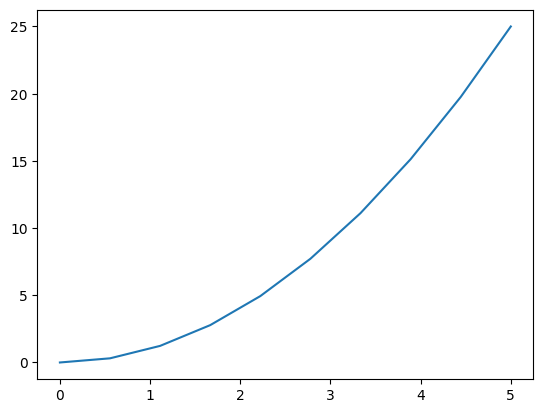

In [3]:
plt.plot(x, y)
plt.show()

Exactly how the plot is displayed will depend on the environment we are working in and how we have things configured. Generally, if we are running in a Jupyter notebook the plot will be displayed inline in the notebook. If we are running the Python code as a script the plot will be displayed in a separate window.

### 1.2 A simple plot

The previous plot displayed the curve but was lacking axis labels, a title, etc. We can add these using various pyplot functions. In the example below we use `xlabel`, `ylabel` and `title` to add the annotation. We also use `plt.figure` to start a new figure and `plt.show` to display the figure. Note also that we have provide a 3rd parameter to the `plot` function with the value 'b-'. This specifies the colour and line style of the curve. 'b-' means a blue solid line. We can change the color by using a different first letter, e.g., 'r-' would be a red solid line. We can also use other line styles, e.g., 'r--' would be a red dashed line, 'r.' would be a red dotted line, etc. See the Matplotlib documentation for a full list of colours and line styles.

Text(0.5, 1.0, 'Plot of y = 2^x')

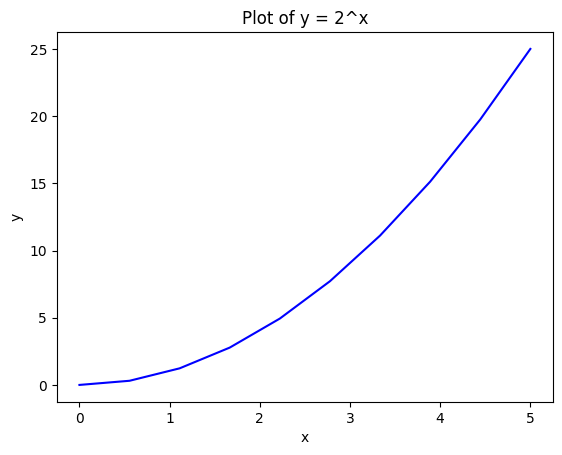

In [4]:
plt.figure()
plt.plot(x, y, "b-")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of y = 2^x")
plt.show()

### 1.3 Object-oriented API

Somewhat confusingly, Matplotlib provides two different APIs for generating plots. The first is the `pyplot` API which we have been using so far. This is a **procedural API** which is very similar to the MATLAB plotting API. The second is the **object-oriented API**. This is more flexible and allows us to have more control over the plot. This will be more useful when we want to produce more complicated plots, e.g., plots with multiple axes in the same figure.

The following example shows how we can use the object-oriented API to produce the same plot as before.

Text(0.5, 1.0, 'y = 2^x')

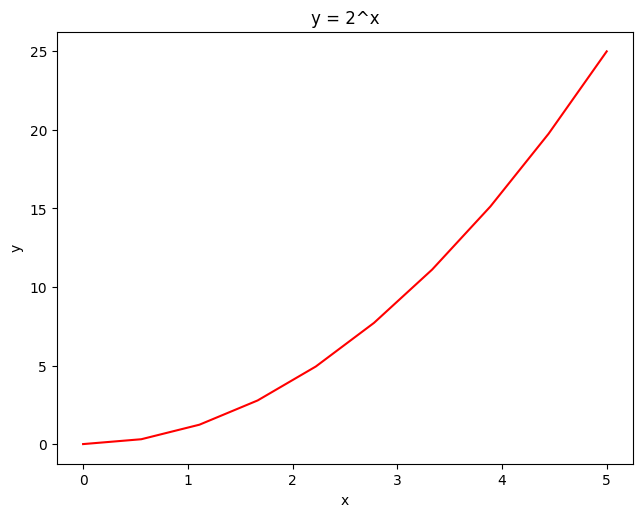

In [5]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.9])
axes.plot(x, y, "r-")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.set_title("y = 2^x")
plt.show()

```{note}
An API is an Application Programming Interface. It is a set of functions and classes that can be used to interact with a software library. The API defines how the functions and classes can be used and what parameters they take. The API is the interface between the user and the library.
```

## 2 Structuring plots

We will now introduce some methods for structuring more complex plots. We will see how to add multiple axes to a figure and how to control the layout of the axes. We will also see how to save plots to files and how to add a legend.

### 2.1 Multiple axes in a figure

Using object-oriented API we can add multiple axes to a figure using the `add_axes` method which takes the coordinates of the bottom-left and top-right corners of the axes (in the range 0 to 1). The following example shows how to add two axes to a figure.

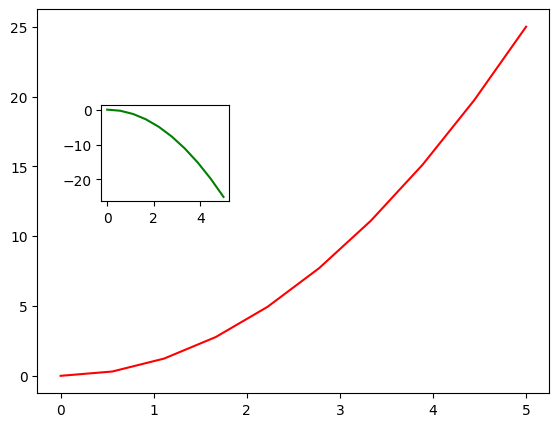

In [6]:
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes1.plot(x, y, "r-")
axes2 = fig.add_axes([0.2, 0.5, 0.2, 0.2])
axes2.plot(x, -y, "g-")
plt.show()

### 2.2 Using the subplot layout manager

If we want a regular grid of axes we can use the `subplots` function. This takes two parameters: the number of rows and the number of columns. It returns a figure object and a 2-D numpy array storing the individual axis objects. We can then select the axis from the array that we wish to plot on.

For example, the following example shows how we might create a 2x2 grid of axes.

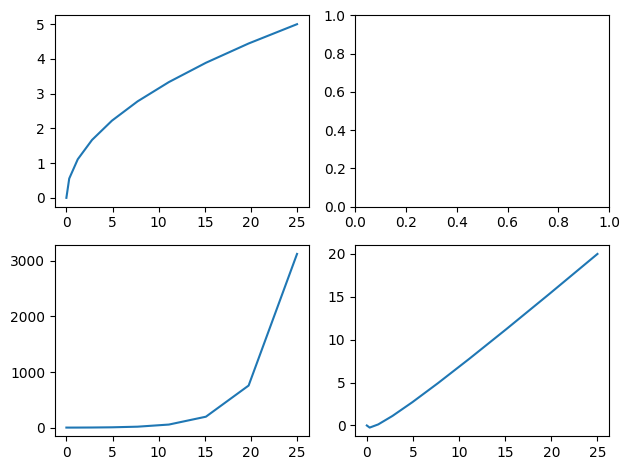

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].plot(y, x)
axes[1, 0].plot(y, x**x)
axes[1, 1].plot(y, x**2 - x)
fig.tight_layout()  # adjusts spacing to avoid plots overlapping labels
plt.show()

Note the use of the `tight_layout` function immediately before the called to `show`. This  adjust the spacing between the axes to make sure the labels do not overlap.

The following example is a little more complicated. After making the axes it iterates over them using a loop and does the plotting and labeling for each one.

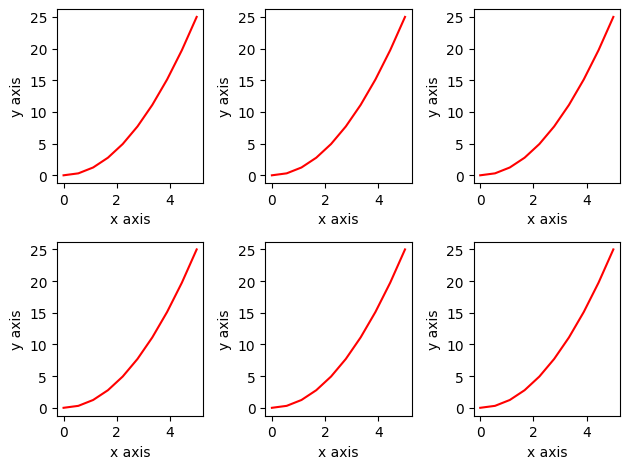

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3)
for ax in axes.reshape(-1):  # axes is returned a 2x4 numpy array; reshape into a vector
    ax.plot(x, y, "r")
    ax.set_ylabel("y axis")
    ax.set_xlabel("x axis")
fig.tight_layout()  # adjusts spacing to avoid plots overlapping labels
plt.show()

Note, the use of the NumPy reshape function, i.e., `axes.reshape(-1)`, which is being used to turn the 2-D array of axes into a 1-D array. This type of reshaping is a common trick in NumPy which makes it easy to iterate over all the elements of a multi-dimensional array without having to use nested loops.

### 2.3 Setting the figure size

The size of the figure can be set using the `set_size_inches` method. Note, this is a method of the figure object, i.e., it is setting the size of the entire figure not the of the various plots inside the figure. The size is specified in inches. The default size is 8 by 6 inches.

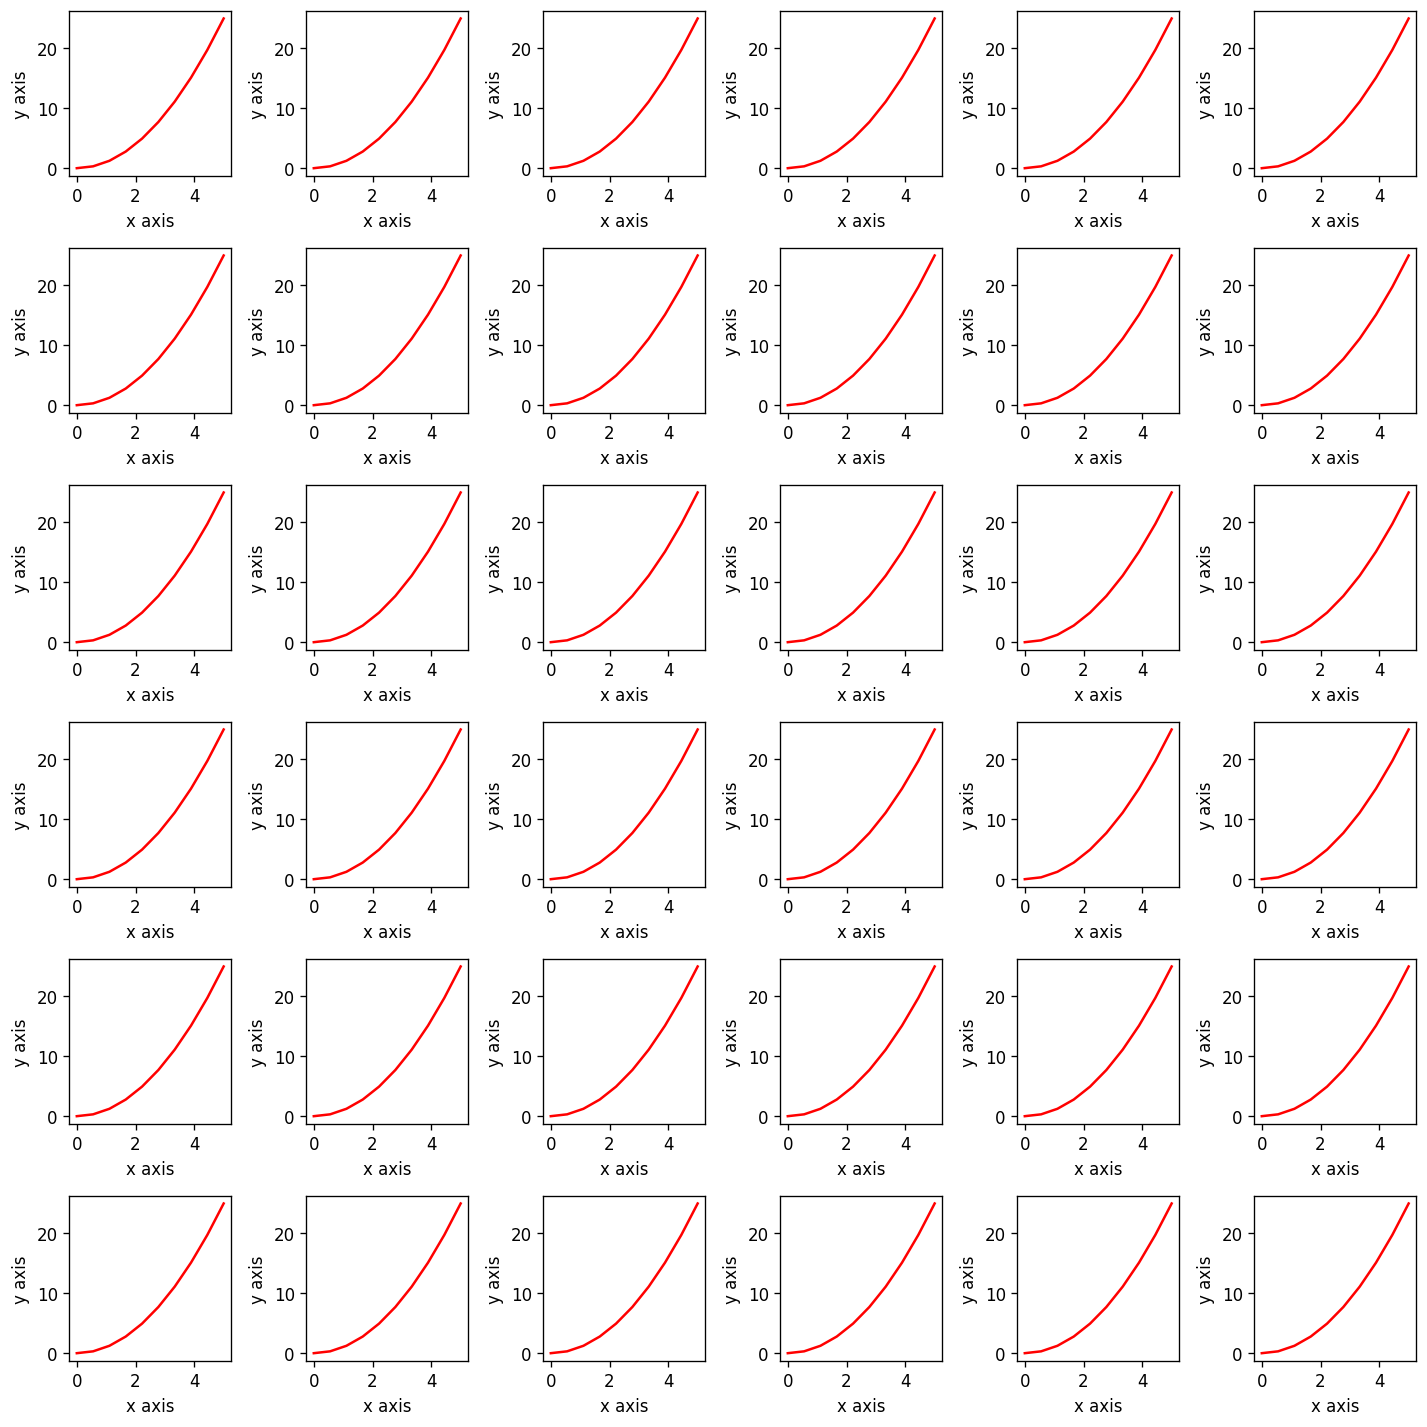

In [9]:
fig, axes = plt.subplots(nrows=6, ncols=6)
fig.set_size_inches((12, 12))  # defaults to 8 by 6
for ax in axes.reshape(-1):
    ax.plot(x, y, "r")
    ax.set_ylabel("y axis")
    ax.set_xlabel("x axis")
fig.tight_layout()
plt.show()

Note above the the `set_size_inches` method takes a single tuple is its input parameter, hence, the need for the double brackets: the inner brackets are for the tuple.

### 2.4 Writing to file

Once we have made a plot it is very easy to save it to a file and there are many image file formats that we can use.

To save the figure we simply use the `savefig` method of the `figure` object, as follows,

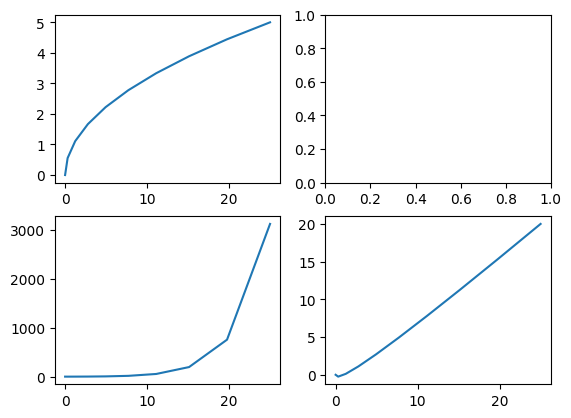

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)
axes[0, 0].plot(y, x)
axes[1, 0].plot(y, x**x)
axes[1, 1].plot(y, x**2 - x)
plt.show()
fig.savefig("figures/myplot.pdf", dpi=200)  # setting 'dots per inch'

The function will infer the file format from the file extension. In the above example we have saved the plot as 'PDF' and we have also set the resolution of the figure using the `dpi` parameter  (dpi means `dots per inch`). The `dpi` parameter is optional and if it is not supplied it will default to 80. Setting this to a higher value can be useful if we want to make a high quality plot for printing.

### 2.5 Adding a legend

In the examples so far we have placed a separate curve on each axis and we can use the title to explain what the curve represents. However, if we want to place multiple curves on the same axis we need to add a 'legend' so that the plot is easy to understand. This can be done using the `legend` method of the axis object.

The following example plots the function $x^2$, $x^x$ and $2^x$ on the same axes. Note, in the code below that when using the `plot` method, we have now also specified a `label` for each curve. The `legend` method then uses these labels to generate the legend. The `loc` parameter specifies where the legend should be placed. The value 0 means that Matplotlib should decide where to place the legend (it tries to position it by choosing a corner where it will not overlap with the data) but you can also specify the location explicitly as either upper-right, upper-left, lower-left or lower-right by using the integers 1, 2, 3 or 4 respectively.

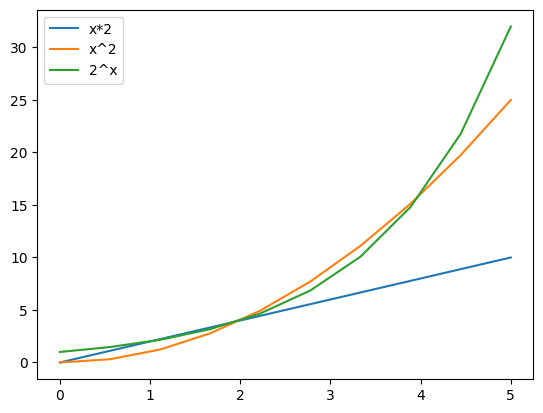

In [12]:
fig, ax = plt.subplots()  # by default returns a single axis
ax.plot(x, x * 2, label="x*2")
ax.plot(x, x * x, label="x^2")
ax.plot(x, 2**x, label="2^x")
ax.legend(loc=0)  # 1=UR, 2=UL, 3=LL, 4=LR, 0=matplotlib decides
plt.show()

Note, Matplotlib has chosen the line colours.

### 2.6 Changing colors and linestyles

Matplotlib provides a lot of flexibility over how plots are displayed. We can control the colour, line style, marker style, etc. of each curve. This is done by setting additional optional parameters to the `plot` method, e.g. `color`, `linestyle`, `marker`, `markersize` etc.

The following example shows how to do this.

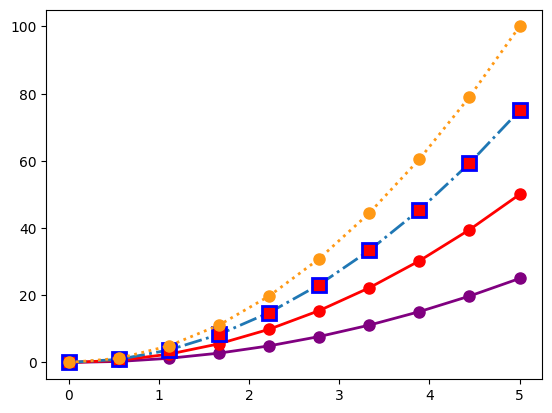

In [13]:
fig, ax = plt.subplots()
ax.plot(x, y, label="y", color="purple", linewidth=2, linestyle="-", marker="o", markersize=8)
ax.plot(x, y * 2, label="2y", lw=2, ls="-", marker="o", c="red", ms=8)
ax.plot(x, y * 3, label="3y", lw=2, ls="-.", marker="s", ms=10, mfc="red", mec="blue", mew=2)
ax.plot(x, y * 4, label="4y", lw=2, ls=":", marker="o", c="#ff9915", ms=8)
ax.legend(loc=0)
plt.show()

Notice how the legend automatically picks up the corresponding colours and line styles.

Marker symbols can be '+', 's', '*', 'o' and many others. See the Matplotlib documentation for a full list.

### 2.7 Controlling the axes

Matplotlib also provides a lot of control over exactly how the axes are displayed. We can control the range, the tick spacing, the tick labels, the grid lines, etc. If we do not specify values explicitly then Matplotlib works out sensible settings itself (as in the previous examples), but we often want to take control.

The following example shows some examples of how to do this.

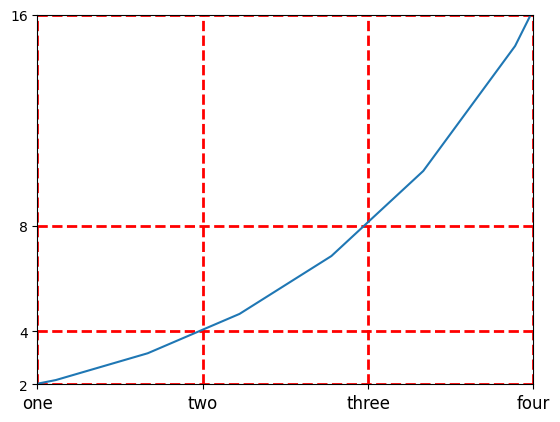

In [14]:
fig, ax = plt.subplots()
ax.plot(x, 2**x)
ax.set_xlim([1, 4])  # Setting the x axes limits
ax.set_ylim([2, 16])  # Setting the y axes limits
ax.set_yscale("linear")  # can be 'linear' or 'log'
ax.set_yticks([2, 4, 8, 16])  # Specify the tick locations
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(["one", "two", "three", "four"], fontsize=12)
ax.grid(color="red", linewidth=2, linestyle="dashed")  # Add a grid
plt.show()

### 2.8 Repositioning the spines

By default, axes will appear along the bottom and left of the plot. This is irrespective of the range of the data and whether the range includes negative values. For more traditional plots we often want the axes to be positioned at the origin. This can be done using the `spines` attribute of the axis object. The following example shows how to do this.

(-5.5, 5.5, -137.5, 137.5)

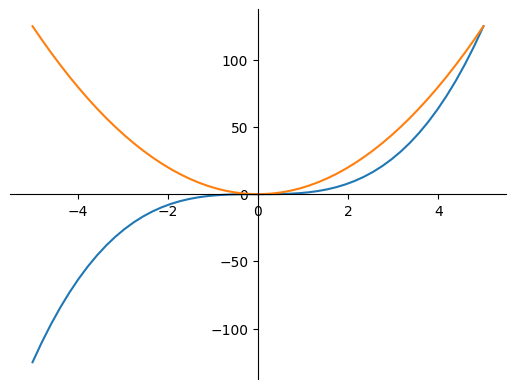

In [15]:
x = np.linspace(-5, 5, 50)
fig, ax = plt.subplots()
ax.plot(x, x**3)
ax.plot(x, x**2 * 5)
ax.spines["left"].set_position(("data", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["top"].set_color("none")
ax.spines["right"].set_color("none")
ax.axis("tight")
plt.show()

### 2.9 Adding text

Additional text annotations can be added to a plot using the the `text` method of the axis object. This takes the x and y coordinates of the text and the text string. Optional parameters such as `fontsize` can be used to control the appearance of the text.

The following example shows how to do this.

Text(-2, 5, '$y=2x+1$')

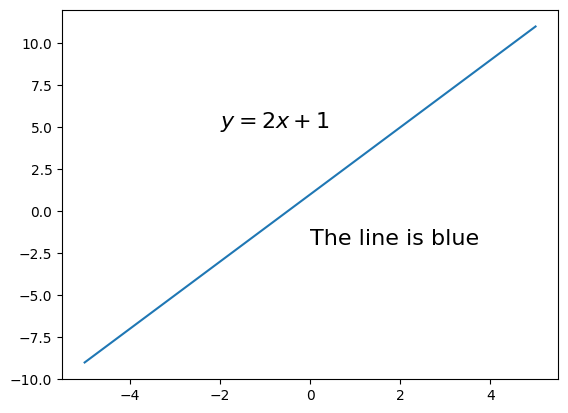

In [16]:
x = np.linspace(-5, 5, 10)
fig, ax = plt.subplots()
ax.plot(x, x * 2 + 1)
ax.text(0, -2, "The line is blue", fontsize=16)
ax.text(-2, 5, "$y=2x+1$", fontsize=16)
plt.show()

### 2.10 More complex figure layouts

For more flexible layouts we can use `subplot2grid`. This allows us to specify the number of rows and columns in the figure and the position of each axis, but it also allows axes to span multiple rows and columns. The following example shows how to do this.

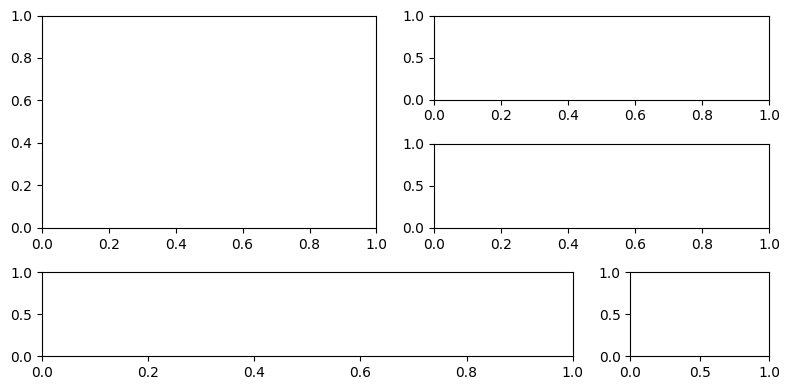

In [20]:
fig = plt.figure()
fig.set_size_inches((8, 4))
## subplot2grid((nrows, ncols), (row_pos, col_pos))
ax1 = plt.subplot2grid((3, 4), (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid((3, 4), (0, 2), colspan=2, rowspan=1)
ax3 = plt.subplot2grid((3, 4), (1, 2), colspan=2, rowspan=1)
ax4 = plt.subplot2grid((3, 4), (2, 0), colspan=3, rowspan=1)
ax5 = plt.subplot2grid((3, 4), (2, 3), colspan=1, rowspan=1)
fig.tight_layout()
plt.show()

## 3 Other plot types

So far we have seen how to plot curves using the `plot` method. Matplotlib can also be used to plot other types of data. In this section we will see how to plot shaded regions, histograms and scatter plots. We will also see how to generate 3D plots.

### 3.1  Histograms and bar charts

If we have a set of data points we can display the distribution of the data as histogram using the `hist` method. This takes the data as a parameter and optionally the number of bins to use. The same method can also be used to plot a cumulative histogram by setting the `cumulative` parameter to `True`.

In the example below we used the `np.random.randn` function to produce a set of 100,000 random numbers from a normal distribution. We then plot the histogram and the cumulative histogram.

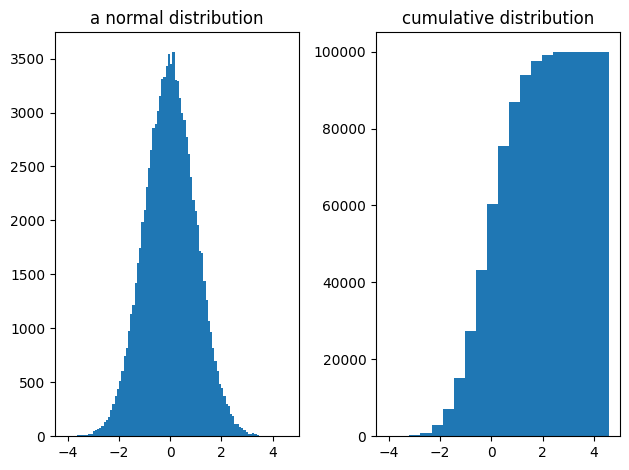

In [18]:
x = np.random.randn(100000)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].hist(x, bins=100)
ax[0].set_title("a normal distribution")
ax[1].hist(x, cumulative=True, bins=20)
ax[1].set_title("cumulative distribution")
fig.tight_layout()
plt.show()

Matplotlib also provide a function called 'bar' for plotting bar charts. Do not confuse this with the 'hist' function. The 'bar' function can take a set of x, y numeric value pairs as in the example below,

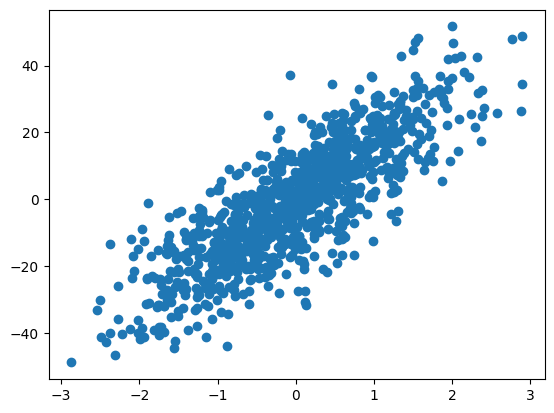

In [19]:
fig, ax = plt.subplots()

## Draw a bar chart (i.e. histogram)
y = np.linspace(-5, 5, 10)
ax.bar(y, y**2, color="green")
plt.show()

However, it is more typically used to plot categorical data. In this case we provide a list of labels and a list of values. The following example shows how to do this.

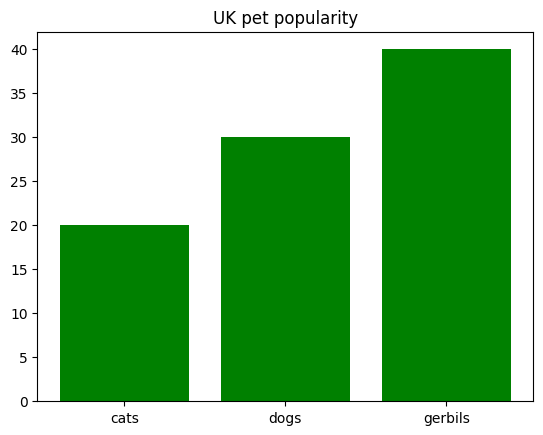

In [19]:
fig, ax = plt.subplots()
## Draw a bar chart (i.e. histogram)
y = np.linspace(-5, 5, 10)
ax.bar(['cats', 'dogs', 'gerbils'], [20, 30, 40], color="green")
ax.set_title("UK pet popularity")
plt.show()

### 3.2 Scatter plots

Often in data science, we want to look at the relationship between a pair of variables. For example, we might want to see if there is a correlation between the height and weight of people sampled from some population. In this case we can use a scatter plot. This is a plot where each sample is represented by a point on the plot and we place the sample according to the value of the two variables.

The following example shows how to do this.

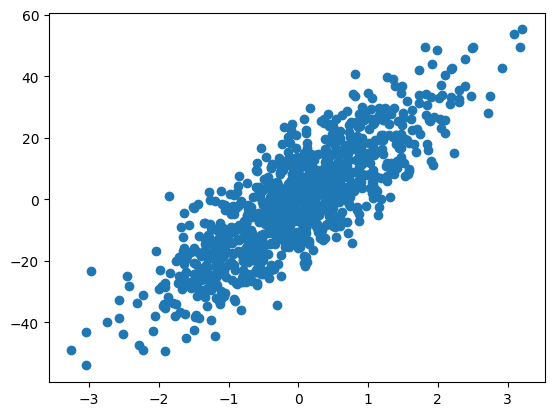

In [20]:
x1 = np.random.randn(1000)
x2 = 15 * x1 + 10 * np.random.randn(1000)
fig, ax = plt.subplots()
ax.scatter(x1, x2)
plt.show()

In the above, we have 1000 samples each with two features, `x1` and `x2`. The scatter plot gives us a clear indication of the relationship between the two variables. In this case, we can see that the points are clustered around a straight line. This is indicates that there is strong correlation between the two variables. This is not surprising in this case because `x2` has been constructed from a linear function of `x1` (namely, $15 x_1 + 10$) with some random noise added.

### 3.3 3D plots

Matplotlib can also be used to make plots showing the relationship between three variables, e.g., imagine that we have a value $z$ that is a function of $x$ and $y$. This kind of plot can be shown as a 3D surface plot, a contour plot, or as a colour mapped image.

For example,  imagine we want to visualise the function $z = cos(x) + sin(y)$. We are first going to use NumPy to generate a grid of $x$ and $y$ values. We are then going to use these to compute a value $z$ for each point on the grid. Finally, we use Matplotlib to plot the values of $z$ as a 3D surface plot.

In [21]:
axis = np.linspace(-5, 5, 100)
# generate matrices X and Y storing a grid of X and Y pixel coordinates
(X, Y) = np.meshgrid(axis, axis)
# perform some operation on the coordinates to get a grid of Z values
Z = np.cos(X) + np.sin(Y)

We can now display the $z$ value using `imshow`. This is a function for displaying 2D arrays as images. The following example shows how to do this.

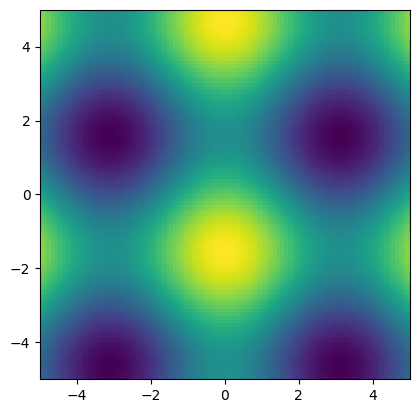

In [22]:
fig, ax = plt.subplots()
ax.imshow(Z, extent=[-5, 5, -5, 5])  # 'extent' used to set axes labels correctly
plt.show()

Contour plots and surfaces can be made in a similar way and examples are shown in the next section.

## 4 Advanced plotting

This section illustrates just a few of Matplotlib's more advanced features.

### 4.1. Colouring in regions

We can easily shade in regions between curves using the `fill_between` method. This takes the x values and the y values of the two curves and fills in the region between them. The following example shows how to do this.

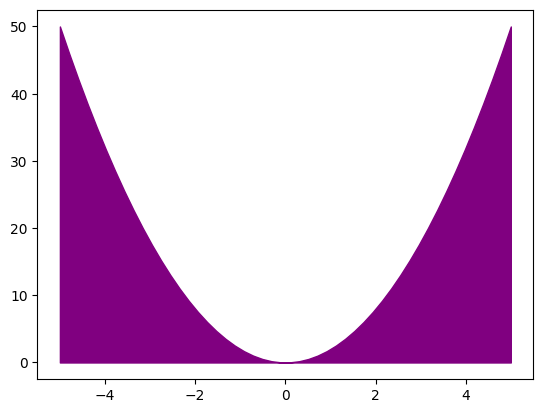

In [23]:
fig, ax = plt.subplots()

## Shade the region between two curves
x = np.linspace(-5, 5, 50)
ax.fill_between(x, 0, x**2 * 2, color="purple")
ax.axis("tight")
plt.show()

### 4.2 Changing the colormap

In the previous section we saw how to display a 2-D array of data as an image using `imshow`. By default, when we did this, the colours ranged between blue (low values) and red (high values). This behaviour can be changed by setting the `colormap`.  Predefined colormaps are provided by Matplotlib with names such as `plt.cm.hot`, `plt.cm.hot`, `plt.cm.RdBu`, etc. The colormap can be specified using the `cmap` parameter.

The following example shows how to do this. The same data that was used in the previous section is replotted using three different colour maps.

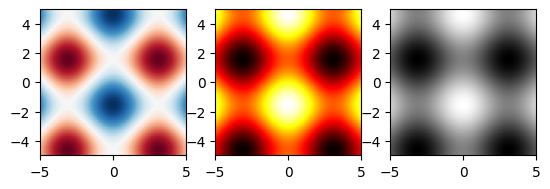

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3)
ax[0].imshow(Z, cmap=plt.cm.RdBu, extent=[-5, 5, -5, 5])
ax[1].imshow(Z, cmap=plt.cm.hot, extent=[-5, 5, -5, 5])
ax[2].imshow(Z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])  # Note US spelling of 'grey'
plt.show()

In [24]:
help(plt.cm)  # see the full list of predefined colour maps

Help on module matplotlib.cm in matplotlib:

NAME
    matplotlib.cm - Builtin colormaps, colormap handling utilities, and the `ScalarMappable` mixin.

DESCRIPTION
    .. seealso::
    
      :doc:`/gallery/color/colormap_reference` for a list of builtin colormaps.
    
      :doc:`/tutorials/colors/colormap-manipulation` for examples of how to
      make colormaps.
    
      :doc:`/tutorials/colors/colormaps` an in-depth discussion of
      choosing colormaps.
    
      :doc:`/tutorials/colors/colormapnorms` for more details about data
      normalization.

CLASSES
    builtins.object
        ScalarMappable
    collections.abc.Mapping(collections.abc.Collection)
        ColormapRegistry
    
    class ColormapRegistry(collections.abc.Mapping)
     |  ColormapRegistry(cmaps)
     |  
     |  Container for colormaps that are known to Matplotlib by name.
     |  
     |  The universal registry instance is `matplotlib.colormaps`. There should be
     |  no need for users to instantiate `

### 4.3 Generating a contour plot

The code below uses the same data but now displays the z value using a contour map.

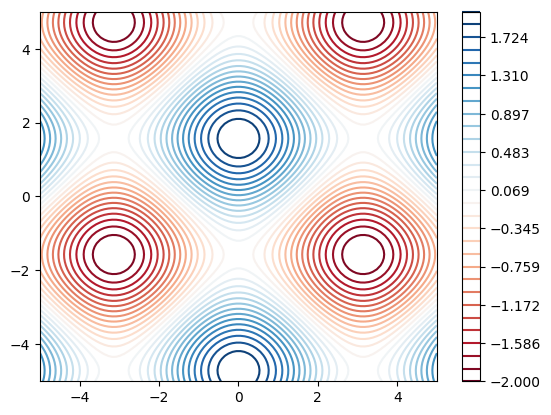

In [24]:
fig, ax = plt.subplots()
levels = np.linspace(-2, 2, 30)
im = ax.contour(Z, cmap=plt.cm.RdBu, extent=[-5, 5, -5, 5], levels=levels)
fig.colorbar(im, ax=ax)
plt.show()

### 4.4 Making 3D figures

We can plot our X, Y, Z data from the previous section as a surface plot or as a wireframe plot. The following example shows how to do this.

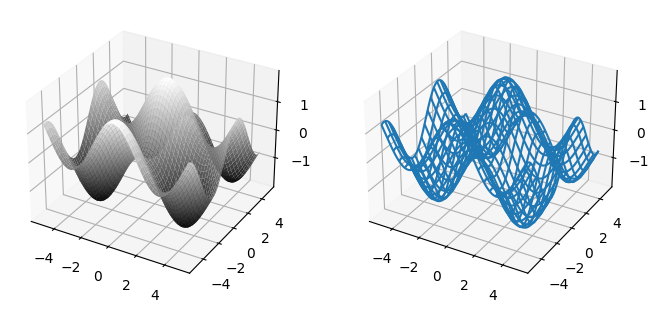

In [25]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 2, 1, projection="3d")  # generate an Axes3D
im = ax1.plot_surface(X, Y, Z, cmap=plt.cm.gray)
ax2 = fig.add_subplot(1, 2, 2, projection="3d")  # generate an Axes3D
im = ax2.plot_wireframe(X, Y, Z, rstride=4, cstride=4)
plt.show()

Note that these plots are displayed on 3-D axes. For documentation on how to comtrol 3-D axes, see the documentation for the `Axes3D` class which can be found in the `mpl_toolkits.mplot3d.axes3d` module.

In [27]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
help(Axes3D)

Help on class Axes3D in module mpl_toolkits.mplot3d.axes3d:

class Axes3D(matplotlib.axes._axes.Axes)
 |  Axes3D(fig, rect=None, *args, elev=30, azim=-60, roll=0, sharez=None, proj_type='persp', box_aspect=None, computed_zorder=True, focal_length=None, **kwargs)
 |  
 |  3D Axes object.
 |  
 |  .. note::
 |  
 |      As a user, you do not instantiate Axes directly, but use Axes creation
 |      methods instead; e.g. from `.pyplot` or `.Figure`:
 |      `~.pyplot.subplots`, `~.pyplot.subplot_mosaic` or `.Figure.add_axes`.
 |  
 |  Method resolution order:
 |      Axes3D
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, fig, rect=None, *args, elev=30, azim=-60, roll=0, sharez=None, proj_type='persp', box_aspect=None, computed_zorder=True, focal_length=None, **kwargs)
 |      Parameters
 |      ----------
 |      fig : Figure
 |          The parent figu

### 4.5 Adding 2-D projections to a 3-D plot

We can also add 2-D projections to a 3-D plot. The following example shows how to do this.

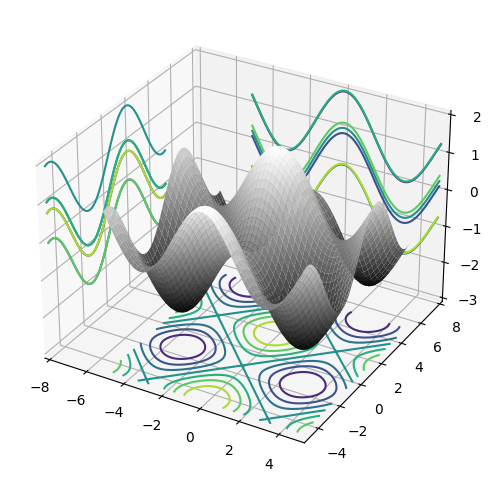

In [26]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1, projection="3d")  # generate an Axes3D
ax.plot_surface(X, Y, Z, cmap=plt.cm.gray)
ax.contour(X, Y, Z, zdir="z", offset=-3)
ax.contour(X, Y, Z, zdir="x", offset=-8)
ax.contour(X, Y, Z, zdir="y", offset=+8)
ax.set_xlim3d(-8, 5)
ax.set_ylim3d(-5, 8)
ax.set_zlim3d(-3, 2)
plt.show()

### 4.6 Generating Animations

In this final subsection, we show how you can make animations using Matplotlib. This is done using the `animation` module. This module provides a function called `FuncAnimation` which takes a figure and a function as parameter. The function it is passed should itself have a single integer 'frame index' parameter. The FuncAnimation function will call the function it has been passed multiple times, each time with a new frame index. We can decide how many frames to generate by using `FuncAnimation`'s  integer `frames` parameter. The `FuncAnimation` method returns an animation object. We can then call the `save` method of the animation object to save it to an animated *gif file*.

This all sounds very complicated but it can be made clear by an example,

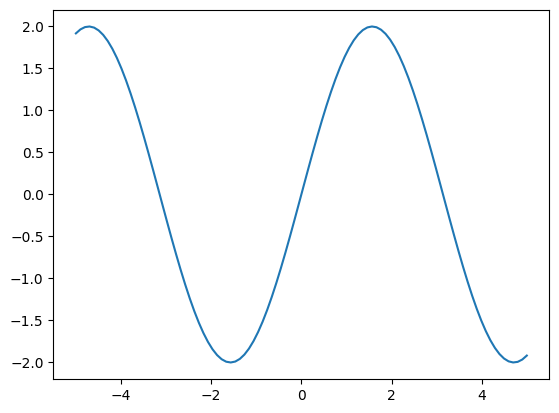

In [27]:
from matplotlib import animation

fig, ax = plt.subplots()


def update(frame_counter):
    plt.cla()
    x = np.linspace(-5, 5, 100)
    y = np.sin(x * (1.0 + frame_counter / 10.0)) + np.sin(x)
    ax.plot(x, y)


anim = animation.FuncAnimation(fig, update, frames=200)
anim.save("figures/animation.gif", fps=20)

The resulting gif file is shown below.

![animation.gif](figures/animation.gif)

## 5 Introducing Seaborn

Seaborn is a Python package for generating statistical plots. It is based on Matplotlib but provides a higher-level interface that reduces the amount of code that we need to write ourselves. It can produce plots such as histograms, boxplots, scatter plots, etc. It can produce plots with a single line of code that would not easy to make using Matplotlib directly.

To use Seaborn we must first import the package. It is conventional to import it as `sns`.

In [31]:
import seaborn as sns

Seaborn comes with some inbuilt datasets that can be used for testing and demonstrations. We can load these using the `load_dataset` function. The following example loads the `mpg` dataset which contains data on the fuel consumption of various cars.

In [32]:
mpg = sns.load_dataset("mpg")

The data is returned as a Pandas DataFrame (Seaborn has been designed to work with Pandas). We can use the DataFrame `head` method to display the first few rows of the dataframe.

In [33]:
print(mpg.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


Seaborn has extensive functionality for visualising data. In the sections below we will consider visualising statistical relationships between variables, visualising distributions of data and visualising categorical data. For further examples see the Seaborn documentation and in particular the tutorial sections [http://seaborn.pydata.org/tutorial.html](http://seaborn.pydata.org/tutorial.html).

Note, Seaborn also provides a number of different 'themes', i.e., different styles for the plots. The default theme is called 'darkgrid'. We can change the theme using the `set_style` function. The following example shows how to do this.

In [34]:
sns.set_style("whitegrid")

For a full list of themes see the Seaborn documentation.

### 5.1 Visualising statistical relationships

Relationships between variables can be visualised using the `relplot` function. This can be used to generate scatter plots, line plots, etc.

By default, the `relplot` function will generate a scatter plot. The following example shows how to show the relationship between the `horsepower` and `mpg` variables for all the cars in the `mpg` dataset.

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

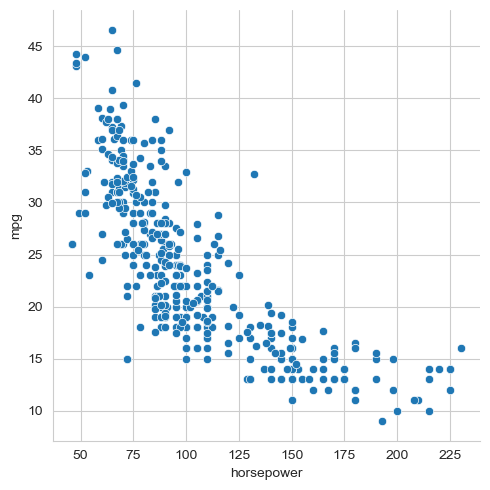

In [35]:
sns.relplot(data=mpg, x="horsepower", y="mpg")
plt.show()

Note, we could have produced this plot using Matplotlib directly but it would have taken a lot more code, i.e., we would have had to extract the data from the DataFrame, label the axes, set up the grid, etc.

However, the real power of Seaborn is that it makes it very easy for us to generate more sophisticated plots. For example, say we wanted to use the size of each point in the scatter plot to show a 3rd variable, e.g., the weight of the car. This can be done simply by setting the `size` parameter and selecting the variable we want to attach to it, i.e., 'weight'.

The following example shows how to do this.

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

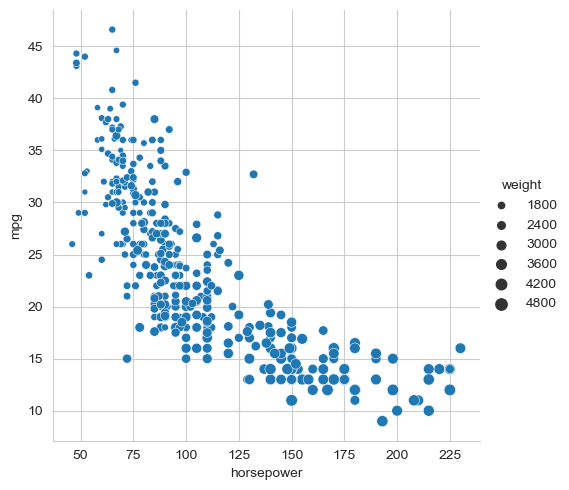

In [36]:
sns.relplot(data=mpg, x="horsepower", y="mpg", size="weight")
plt.show()

Note how Seaborn has automatically labelled the axes for us and added a legend.

We can also use the colour of each point to show a 4th variable. This can be done by setting the `hue` parameter. The following example shows how to do this.

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

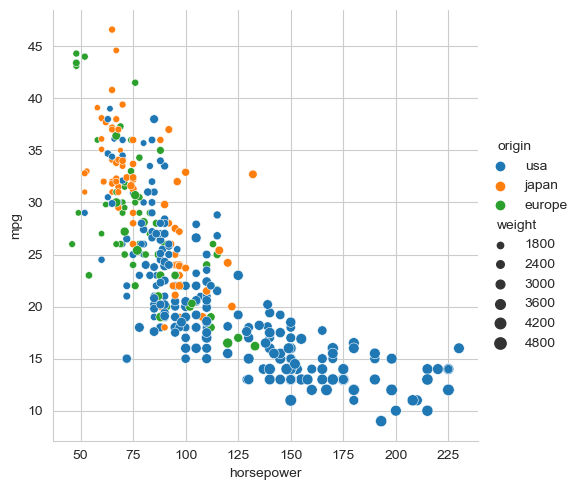

In [37]:
sns.relplot(data=mpg, x="horsepower", y="mpg", size="weight", hue="origin")
plt.show()

From this plot we can see that the cars from Japan and Europe tend to be lighter and more fuel efficient than the cars from the USA. Note, this dataset consists of cars from the 1970s and 1980s. The differences between the regions may be less pronounced in more recent years. Petrol used to be very cheap in the the USA, so fuel efficiency was not a priority, whereas, is recent years cars have become heavier in order to provide more protection in accidents.

The `relplot` function can also be used to generate line plots. Here we would set the `kind` parameter to `line`. The following example shows how to do this.

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

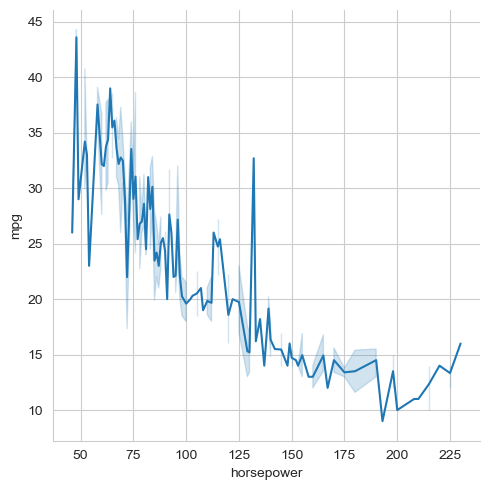

In [38]:
sns.relplot(data=mpg, x="horsepower", y="mpg", kind="line")
plt.show()

It is important to think carefully about whether to use a line or scatter plot. A line plot emphasises the continuity of data along the x-axis. A scatter plot emphasises the individual data points. In this particular case, the scatter plot is probably more appropriate because each point represents a different car and there is no continuity between cars.

When there are a lot of points, scatter plots can become very cluttered and points start to occlude each other. This can make it hard to get a true impression of the distribution of the data. One solution to this is to make the points semi-transparent so that the overlapped points are more visible. This can be done by setting the `alpha` parameter. The alpha value ranges between 0 and 1 with 0 meaning fully transparent and 1 meaning fully opaque. The following example shows how to do this.

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

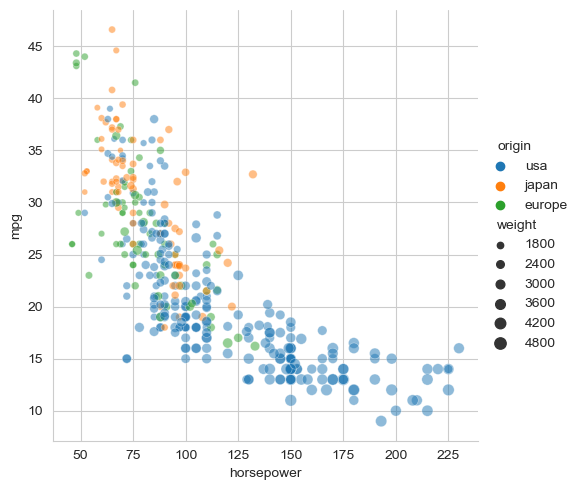

In [39]:
sns.relplot(data=mpg, x="horsepower", y="mpg", size="weight", hue="origin", alpha=0.5)
plt.show()

In the above plots we have tried to show several variables on the same axes. An alternative approach, particularly for categorical variables, is to use multiple axes. Seaborn has the concept of a FacetGrid which is a grid of axes. Each axis shows a different subset of the data. A FacetGrid can be constructed simply by setting the `col` and/or `row` parameters.

For example, to make a grid of plots where the columns represent the different origins ('usa', 'japan' and 'europe') and the rows represent the number of cylinders in the car's engine, we would use the following,

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

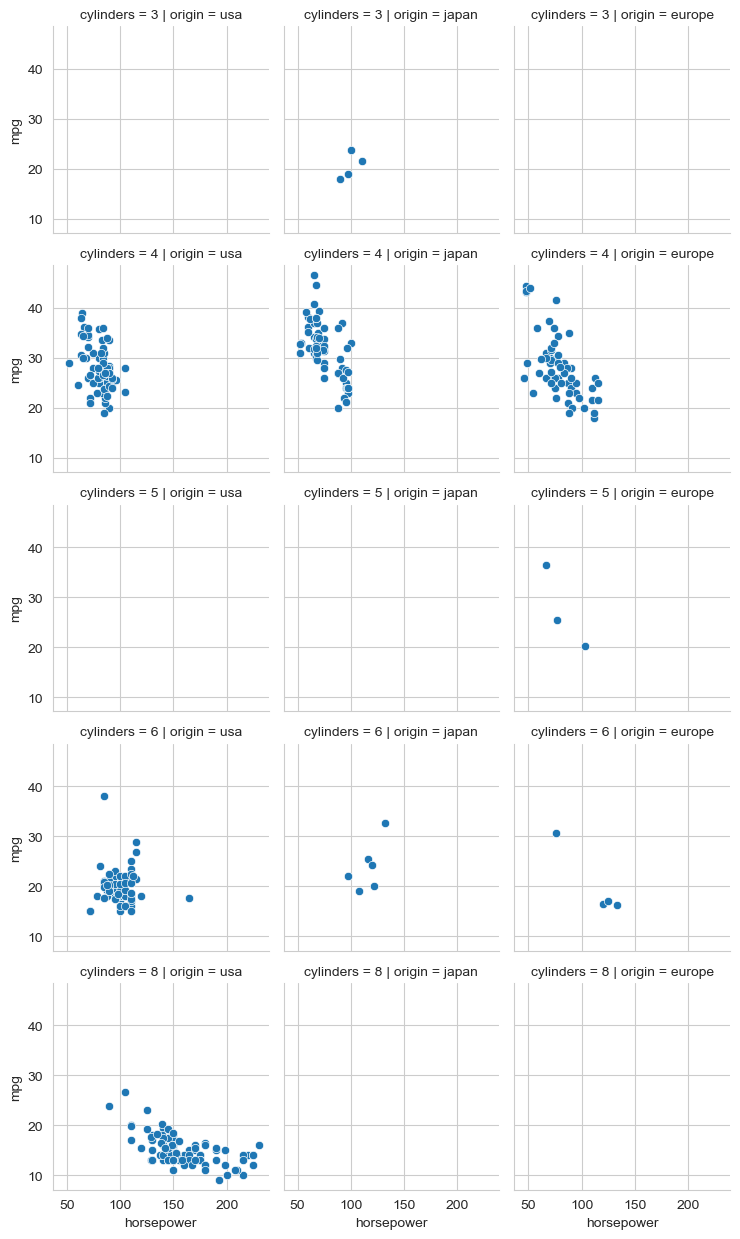

In [40]:
sns.relplot(data=mpg, x="horsepower", y="mpg", col="origin", row="cylinders", height=2.5)
plt.show()

In the above, the `height` parameter is used to set the height of each plot in the grid. The default height is 5 inches. Here we have reduced it to 2.5 so that the entire grid fits on the page a bit better. Note, some of the plots have no data, i.e., there are no 8-cylinder cars from Europe or Japan in this dataset.

### 5.2 Visualising distributions of data

When we have a new set of data, one of the first things we want to do is to understand something about its distribution, e.g., What is its range?  Is tha data clustered about a single value or are there multiple clusters? If the data symmetrically distributed about a central value or is it skewed? etc.  These questions can be answered by plotting the distribution of the data using, for example, a histogram plot.

In Seaborn, distributions are plotted using the `displot` function. This can be used to generate histograms, kernel density (KDE) plots and rug plots.

#### 5.2.1 Plotting univariate distributions

The 'displot' has a parameter called 'kind' which determines the type of plot that will be generated. To examine the distribution of a single variable, i.e., a 'univariate' distribution, a simple histogram is often the best tool and we would use `kind='hist'`. (However, as 'hist' is the default kind, we do not need to specify it explicitly.)

For example, to view the distribution of the weights of cars in our dataset we would use the following

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


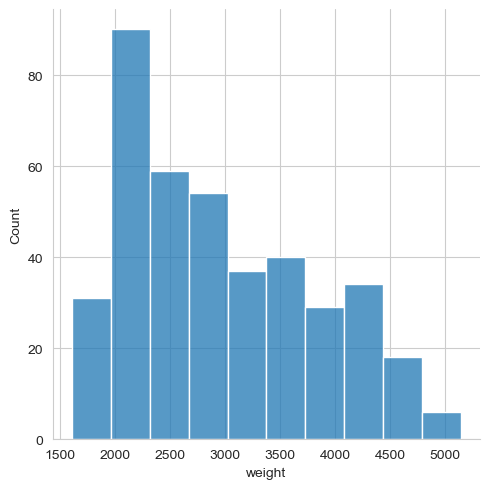

In [41]:
sns.displot(mpg, x="weight")
plt.show()

Seaborn has automatically chosen the number of bins to use in the histogram. It tries to pick something that is sensible based on the variance of the data and the number of samples. However, we can override this by setting the `bins` parameter. For example, if we wanted to use 20 bins, we would use the following,

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


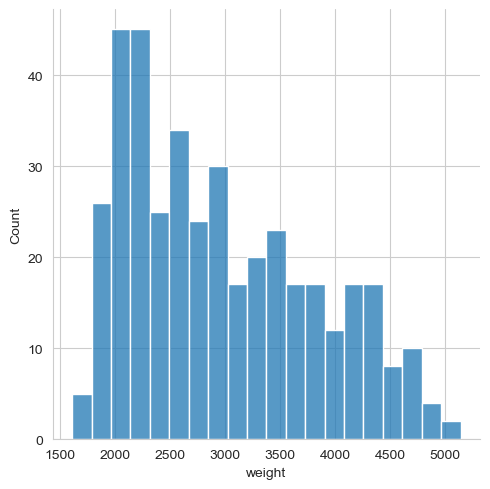

In [42]:
sns.displot(mpg, x="weight", bins=20)
plt.show()

Or we can specify a bin width. For example, if we want each bin to represent a 200 kg range, we would use the following,

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


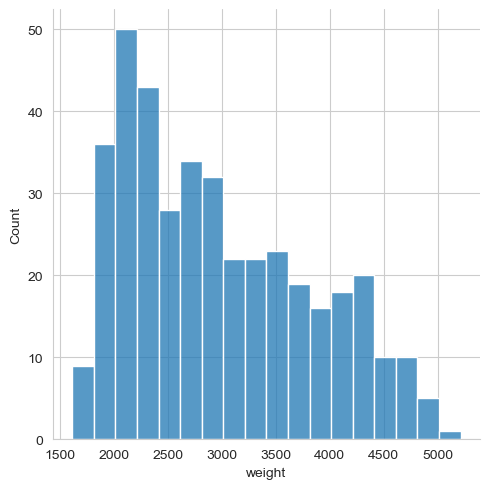

In [43]:
sns.displot(mpg, x="weight", binwidth=200)
plt.show()

In the previous plots, we have made a single histogram for the entire car database. Let's say that we instead wanted to see the distribution of the car weights for each origin separately, i.e., separate distributions for Japan, US and Europe. To do this we can introduce the 'hue' parameter to get separate histograms for each region with each one in a different colour.

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


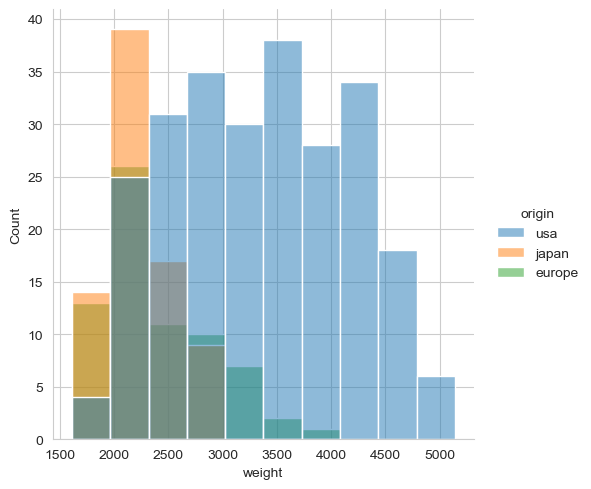

In [44]:
sns.displot(mpg, x="weight", hue="origin")
plt.show()

In this case, the result is not very clear because the distributions are very overlapping. We can make things clearer by using the 'multiple' parameter which can be set to 'stack' to make a stacked histogram, or 'dodge' to make interlaced histograms. For example, using 'dodge' option would look like this,

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

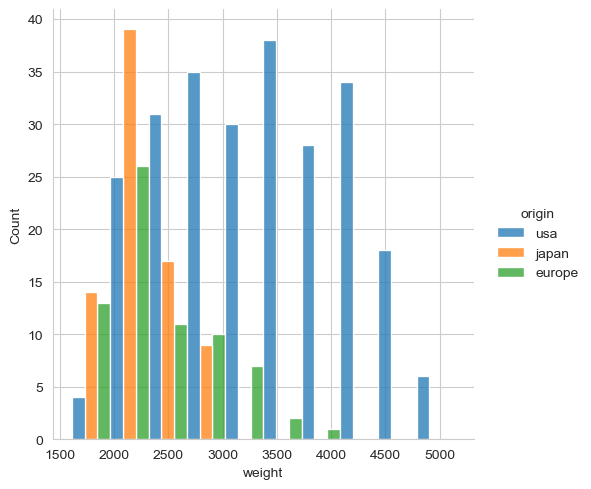

In [45]:
sns.displot(mpg, x="weight", hue="origin", multiple="dodge")
plt.show()

As an alternative to a histogram, we can also plot the distribution of data using a kernel density plot. This is a smoothed version of a histogram. It is a good way to visualise the distribution of data when there are a lot of samples. To make a kernel density plot we use `kind='kde'`. For example, to make a kernel density plot of the weight of cars we would use the following,

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

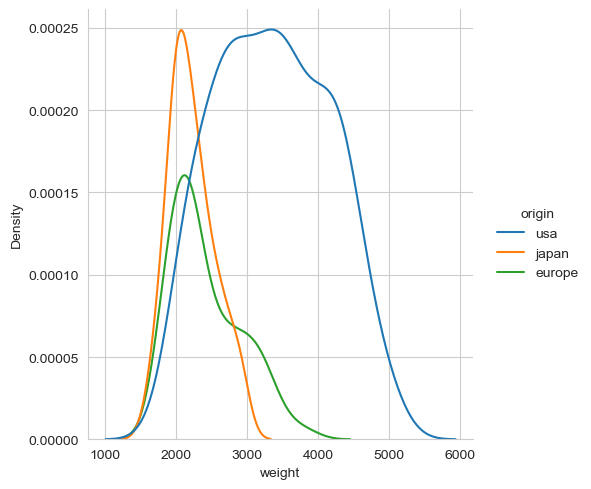

In [46]:
sns.displot(mpg, x="weight", hue="origin", kind="kde")
plt.show()

#### 5.2.2 Plotting bi-variate distributions

If we want to look at the distribution of a pair of variables (i.e., a bi-variate distribution) we still use the displot, but we now also provide a value for the 'y' parameter. This will produce a 2-D histogram, i.e., a grid in which the shading of the tiles in the grid is used to indicate the number of samples in each bin.

For example, to plot the distribution of weight against mpg we would use the following,

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

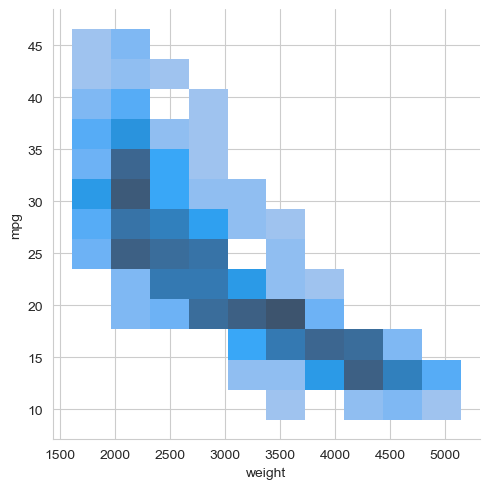

In [47]:
sns.displot(mpg, x="weight", y="mpg")
plt.show()

Again, we can generate separate histogram for different catagories in our data by using the 'hue' parameter. For example, to make a histogram for each region we would use the following,

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

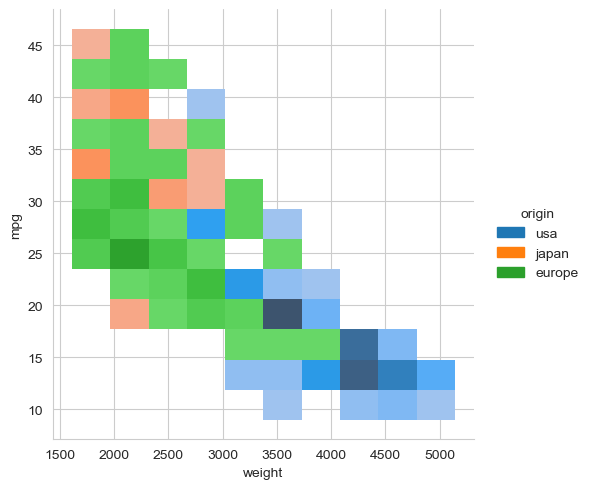

In [48]:
sns.displot(mpg, x="weight", y="mpg", hue="origin")
plt.show()

Again, we could choose to use a kernel density plot instead of a histogram by setting the 'kind' parameter to 'kde'. This would then produce smoothed contour plots to show the distribution of data. For this particular dataset there are not enough samples to use KDE and the result is unsatisfactory, but the code is shown below for the sake of reference.

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

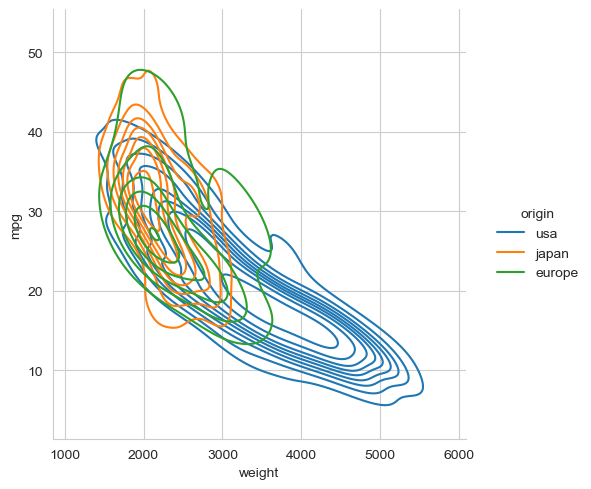

In [49]:
sns.displot(mpg, x="weight", y="mpg", hue="origin", kind="kde")
plt.show()

Finally, Seaborn also provides 'jointplot', a figure-level plotting function that can combine plot types to show both a joint distribution and its marginal distributions in the same figure.

For example,

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

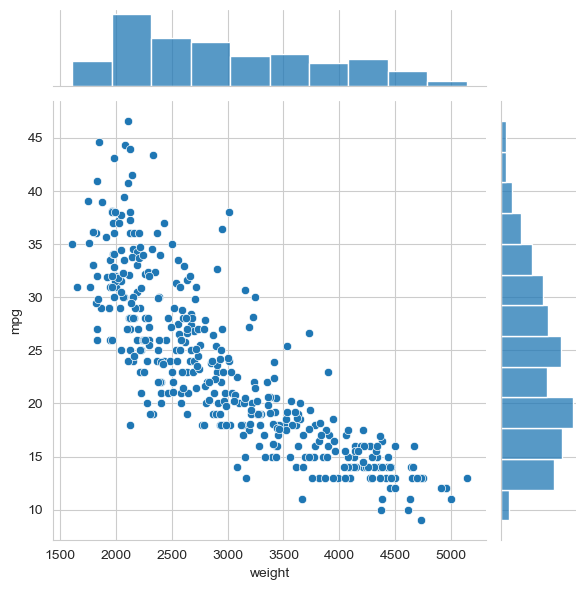

In [50]:
sns.jointplot(data=mpg, x="weight", y="mpg")
plt.show()

For all Seaborn plots, if we want to tailor details of the figures appearance we can easily do so by using additional Matplotlib functions. To do this we need to get the Matplotlib figure object that is stored as an attribute of the Seaborn plot object returned by the Seaborn plotting function.

For example, to change the title and add some additional text,

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


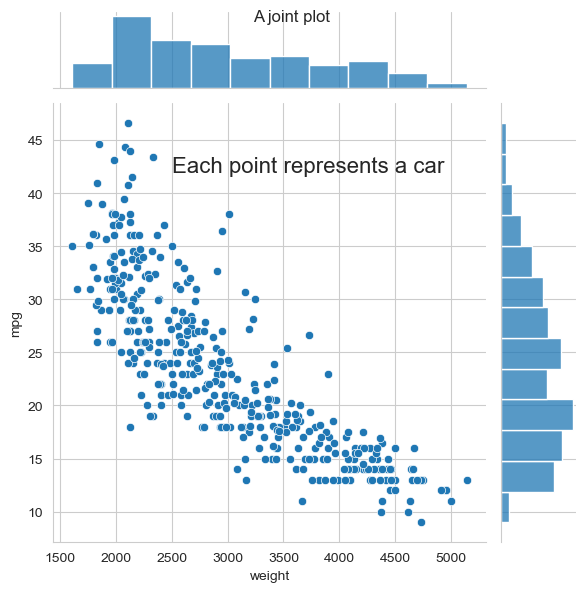

In [51]:
g = sns.jointplot(data=mpg, x="weight", y="mpg")
# 'g' is a Seaborn plot object. It has a 'fig' attribute stores the Matplotlib figure object
matplotlib_figure = g.fig
# We can now use Matplotlib functions to customise the figure
matplotlib_figure.suptitle("A joint plot")
matplotlib_figure.gca().text(2500, 42, "Each point represents a car", fontsize=16)
plt.show()

#### 5.2.3 Plotting multiple distributions

If we want to get a quick overview of the relationship between all pairs of variables in a dataset, we can use the `pairplot` function. This will generate a grid of plots showing the distribution of each pair of variables. The following example shows how to do this.

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

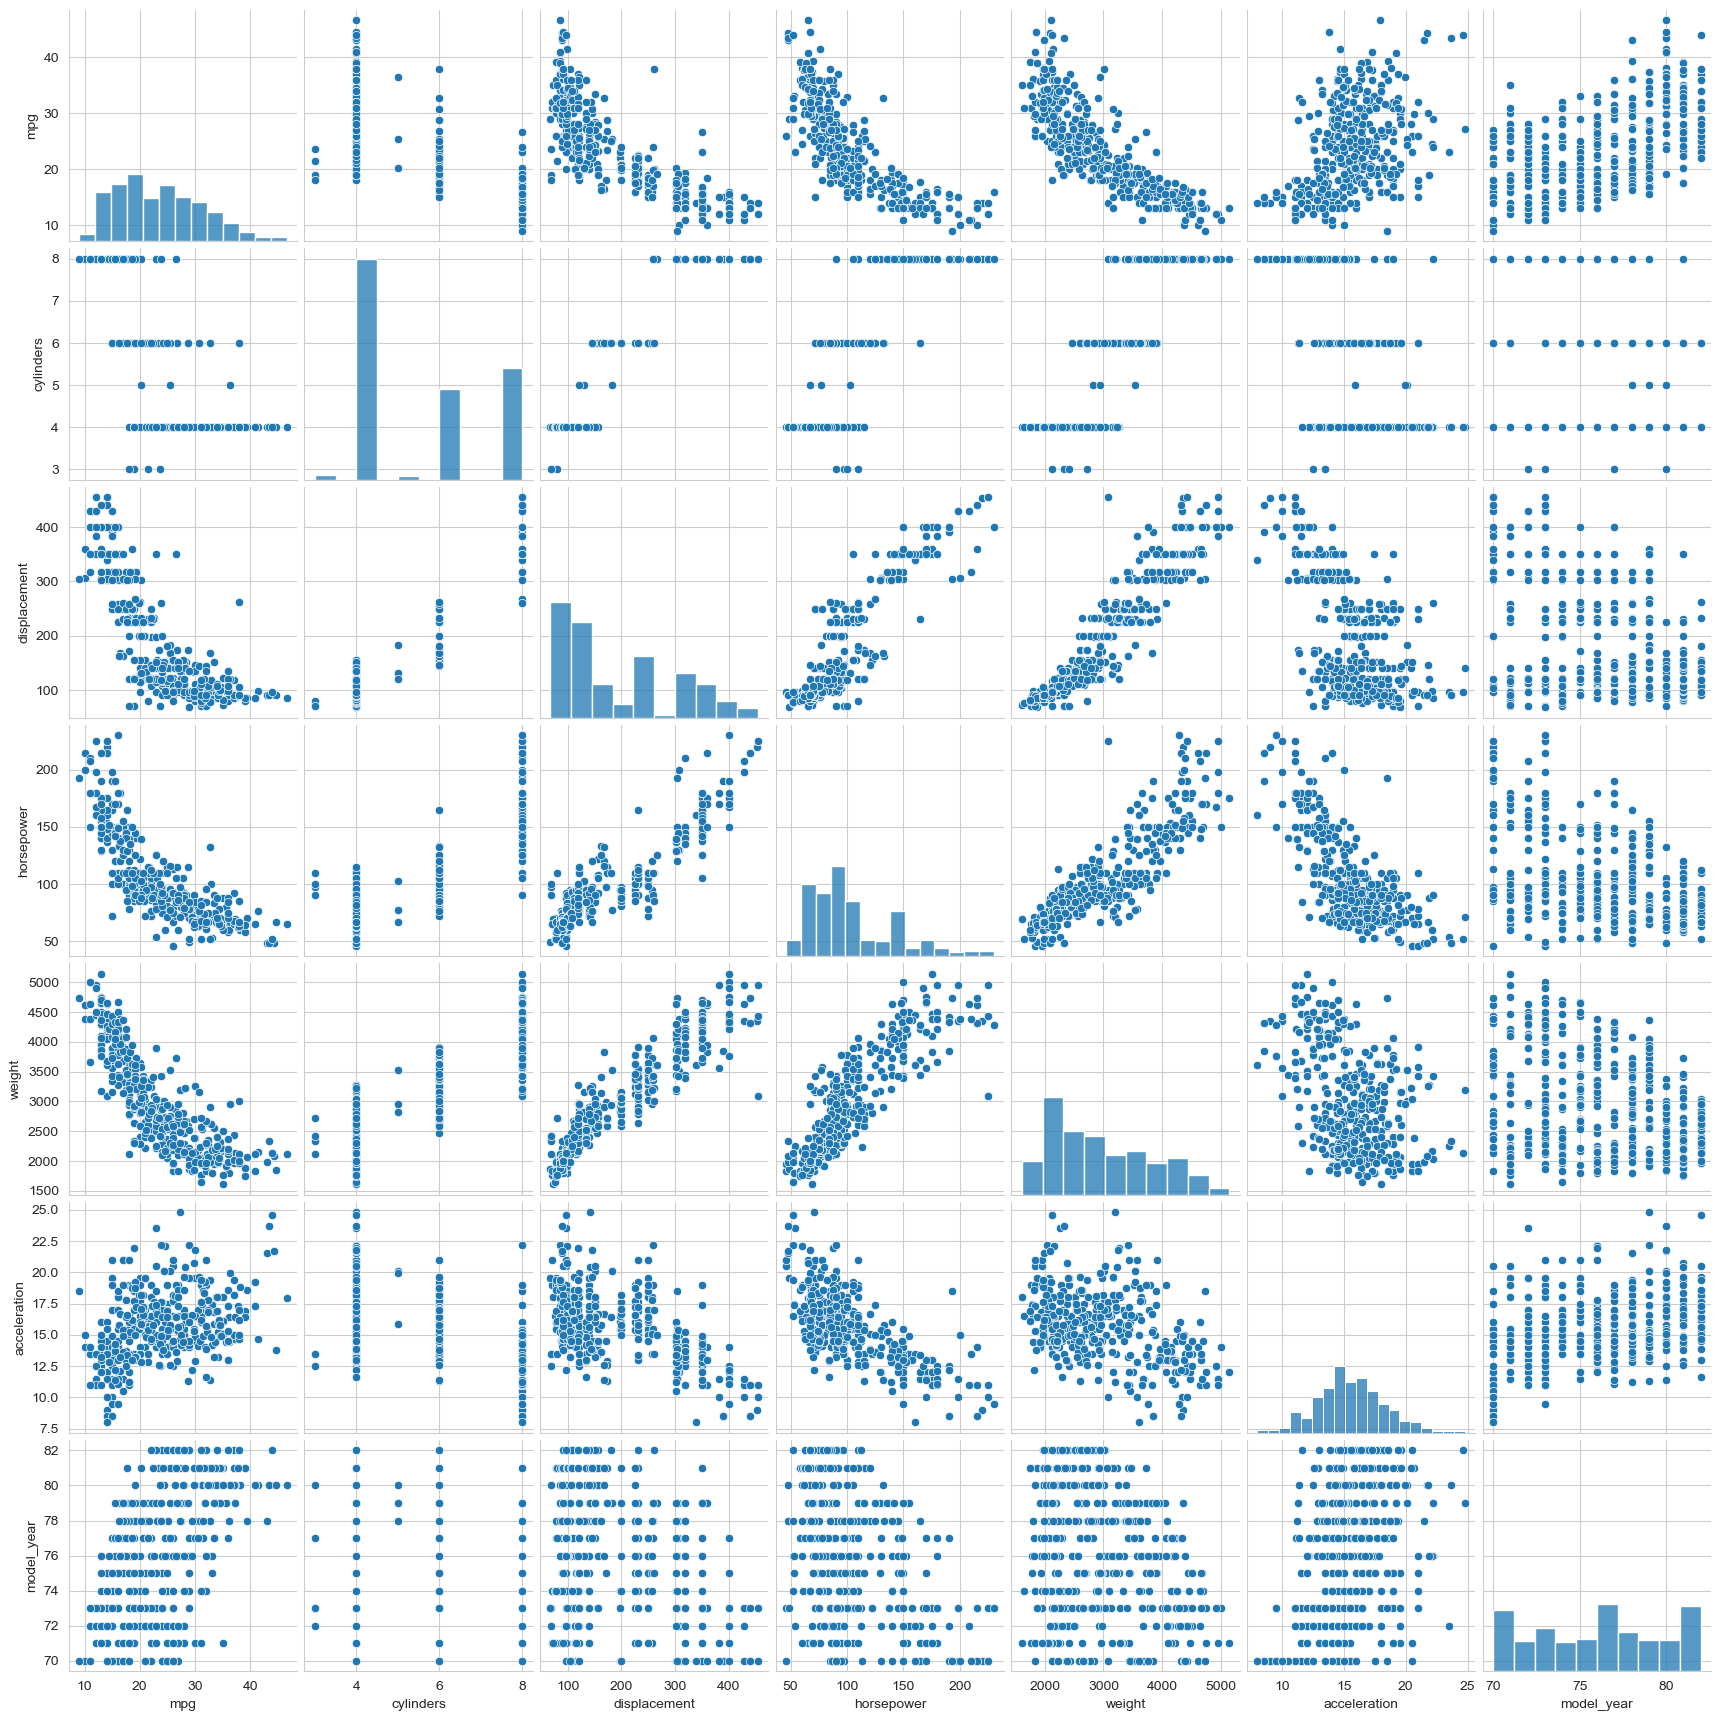

In [52]:
sns.pairplot(mpg)
plt.show()

See the online tutorial for how we can customise these distribution plots further. <https://seaborn.pydata.org/tutorial/distributions.html#>

### 5.3 Visualising categorical data

In the previous section we looked at how we could visualise the relationship between pairs of variables. The scatter plots, histograms and kernel density plots are most appropriate when both of the variables are continuous. However, we often want to visualise the relationship between a continuous variable and a categorical variable. For example, we might want to visualise the relationship between the weight of a car and its origin. In this case, there are more specialised categorical plots that we can use. These would include strip plots, swarm plots, box plots, boxen plots and violin plots. In Seaborn, these plots are all produced  using the `catplot` function and setting the `kind` parameter to select the type of plot we require.

In the examples that follow we will use `catplot` to show the relationship between the fuel efficiency of a car and its origin.

#### 5.3.1 A strip plot

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

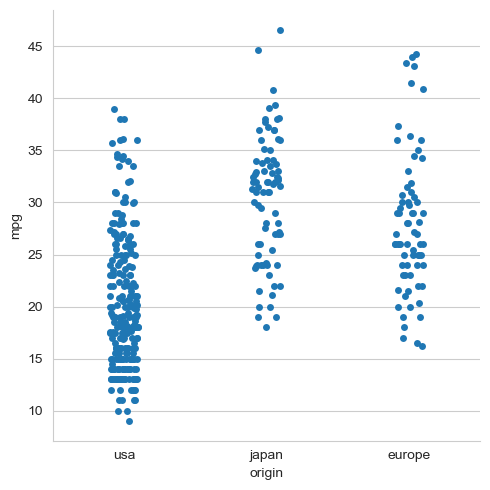

In [53]:
sns.catplot(data=mpg, x="origin", y="mpg", kind='strip')
plt.show()

#### 5.3.2 A 'swarm' plot

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

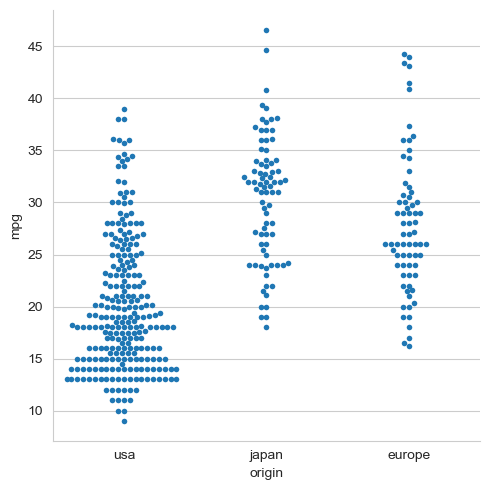

In [54]:
sns.catplot(data=mpg, x="origin", y="mpg", kind='swarm', size=4)
# The default marker size value has been reduced to 4 for display purposes
plt.show()

#### 5.3.3  A box plot

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

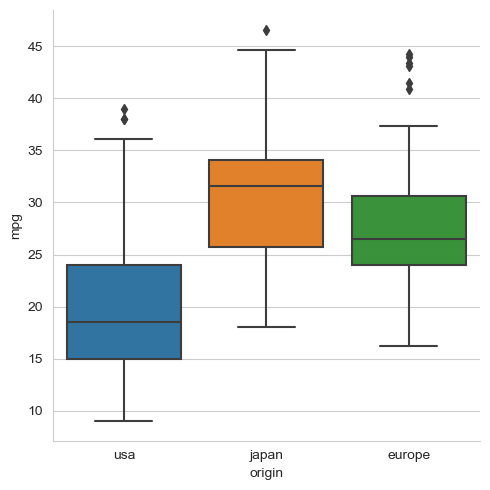

In [55]:
sns.catplot(data=mpg, x="origin", y="mpg", kind='box')
plt.show()

#### 5.3.4 A boxen plot

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

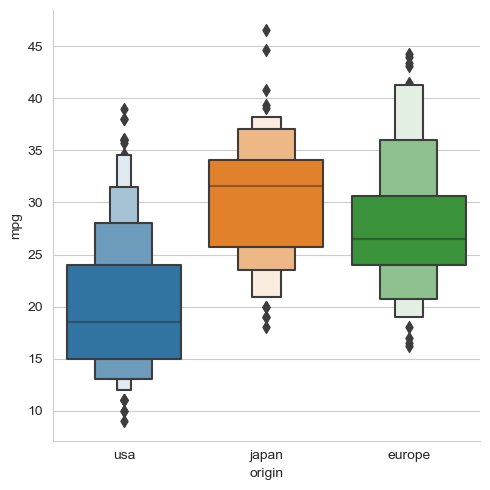

In [56]:
sns.catplot(data=mpg, x="origin", y="mpg", kind='boxen')
plt.show()

#### 5.3.5 A violin plot

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

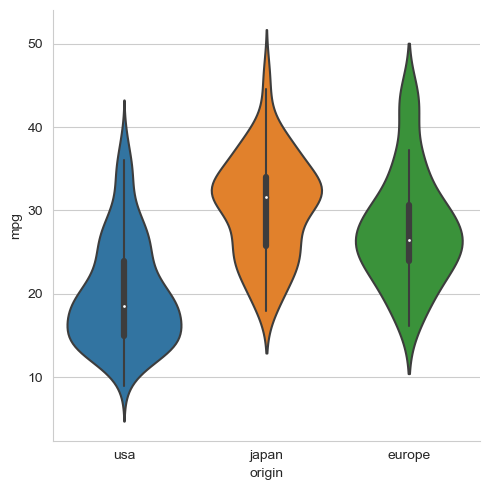

In [57]:
sns.catplot(data=mpg, x="origin", y="mpg", kind='violin')
plt.show()

All of these plots can be customised in various ways using the ideas that we have seen previously. For example, we can use the `hue` parameter to introduce a third variable. For example, to show the relationship between the weight of a car, its origin and the number of cylinders in its engine we would use the following,

/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/envs/com6018_dev/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and w

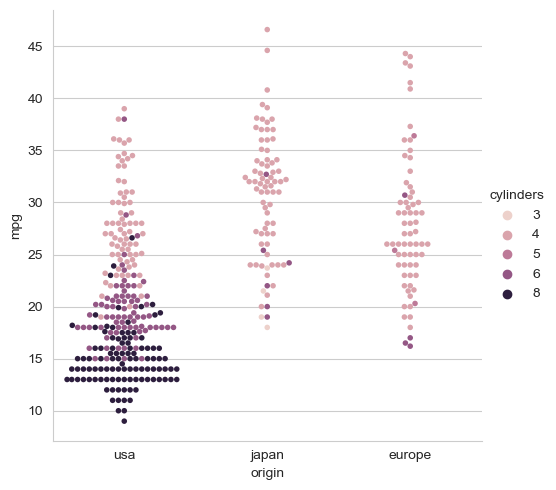

In [58]:
sns.catplot(data=mpg, x="origin", y="mpg", hue="cylinders", kind='swarm', size=4)
plt.show()

## 6 Summary

Matplotlib and Seaborn are very large and sophisticated package for visualising data in Python. Matplotlib works at a lower level than Seaborn. It is highly flexible and allows very precise control but can be a little verbose, i.e., requiring quite a few lines of code to configure each plot. Seaborn is a higher-level package that is built on top of Matplotlib and provides a more convenient interface for common statistical plots. It interfaces elegantly with Pandas dataframes and makes it very easy to generate plots that show the relationship between multiple variables.

Seaborn is very useful for initial data exploration where we are using plots to get a feel for the data and to identify interesting relationships. However, if we want to produce a publication-quality plot, we may need to use additional Matplotlib functionality to get the precise control that we need. e.g., to meet the style guidelines of a particular journal.

In this tutorial,

* we have seen examples of some of the most common plot types,
* we have seen how plots can be built in Matplotlib using its object-based API,
* we have seen some of the more sophisticated functionality for 3D plots, animations, etc.
* we have seen how Seaborn can be used to generate statistical plots.

Many details and features have not been covered, but both packages are very well documented. For documentation and further examples see [http://matplotlib.org](http://matplotlib.org) and [http://seaborn.pydata.org](http://seaborn.pydata.org).